## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.


*Atenção - Utilizar a base de dados em anexo que é a mesma base que utilizamos na atividade anterior! A base Boston, assim como para a primeira atividade foi descontinuada e não deve ser utilizada*

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import datasets
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [27]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [29]:
df_limpo = df.drop(columns=['ocean_proximity']).dropna()
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
dtypes: float64(9)
memory usage: 1.6 MB


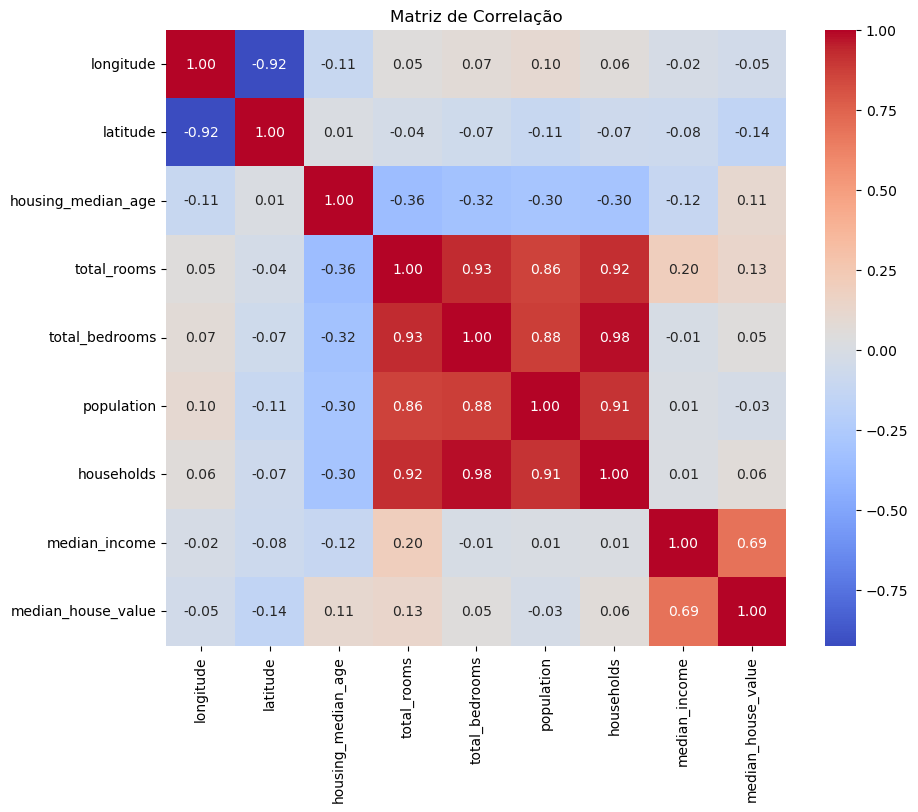

In [33]:
correlacao = df_limpo.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

In [35]:
X = df_limpo.drop(columns=['median_house_value'])
y = df_limpo['median_house_value']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Dados de treino: {X_train.shape}, {y_train.shape}")
print(f"Dados de teste: {X_test.shape}, {y_test.shape}")

Dados de treino: (14303, 8), (14303,)
Dados de teste: (6130, 8), (6130,)


In [47]:
tree_8 = DecisionTreeRegressor(max_depth=8, random_state=42)
tree_8.fit(X_train, y_train)

tree_2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_2.fit(X_train, y_train)


y_pred_8 = tree_8.predict(X_test)
y_pred_2 = tree_2.predict(X_test)

y_pred_8_ = tree_8.predict(X_train)
y_pred_2_ = tree_2.predict(X_train)



In [49]:
mse_8 = mean_squared_error(y_test, y_pred_8)
mse_2 = mean_squared_error(y_test, y_pred_2)


print(f"MSE (Profundidade = 8): {mse_8}")
print(f"MSE (Profundidade = 2): {mse_2}")

mse_8_ = mean_squared_error(y_train, y_pred_8_)
mse_2_ = mean_squared_error(y_train, y_pred_2_)


print(f"MSE Treino (Profundidade = 8): {mse_8_}")
print(f"MSE Treino (Profundidade = 2): {mse_2_}")

MSE (Profundidade = 8): 4092601634.242608
MSE (Profundidade = 2): 7410749993.534345
MSE Treino (Profundidade = 8): 3256184257.5452957
MSE Treino (Profundidade = 2): 7361983879.892756


### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [51]:
path = tree_8.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [53]:
print("\nCCP-Alphas e Impurezas:")
for alpha, impurity in zip(ccp_alphas, impurities):
    print(f"Alpha: {alpha:.5f}, Impurity: {impurity:.5f}")


CCP-Alphas e Impurezas:
Alpha: 0.00000, Impurity: 3256184257.54530
Alpha: 0.00005, Impurity: 3256184257.54534
Alpha: 5384.41819, Impurity: 3256189641.96353
Alpha: 21327.34391, Impurity: 3256210969.30744
Alpha: 32306.50912, Impurity: 3256243275.81657
Alpha: 55374.39698, Impurity: 3256298650.21355
Alpha: 87394.25295, Impurity: 3256386044.46650
Alpha: 99633.81808, Impurity: 3256485678.28458
Alpha: 108734.92305, Impurity: 3256594413.20763
Alpha: 124080.82221, Impurity: 3256718494.02984
Alpha: 131791.46566, Impurity: 3256850285.49550
Alpha: 221454.08198, Impurity: 3257071739.57748
Alpha: 238442.34310, Impurity: 3257310181.92058
Alpha: 296438.90074, Impurity: 3257606620.82132
Alpha: 300173.04062, Impurity: 3257906793.86194
Alpha: 358513.89263, Impurity: 3258265307.75457
Alpha: 364434.09308, Impurity: 3258629741.84765
Alpha: 379236.68244, Impurity: 3259008978.53009
Alpha: 406703.02557, Impurity: 3259415681.55566
Alpha: 411841.34171, Impurity: 3259827522.89738
Alpha: 413017.16093, Impurity: 3

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [57]:
trees = []

for ccp_alpha in ccp_alphas:
    tree = DecisionTreeRegressor(random_state=42, ccp_alpha=ccp_alpha)
    tree.fit(X_train, y_train)
    trees.append(tree)

print(f"Número de árvores treinadas: {len(trees)}")
for i, (tree, alpha) in enumerate(zip(trees, ccp_alphas)):
    print(f"Árvore {i + 1} - CCP Alpha: {alpha:.5f}, Número de Nós: {tree.get_n_leaves()}")

Número de árvores treinadas: 211
Árvore 1 - CCP Alpha: 0.00000, Número de Nós: 13732
Árvore 2 - CCP Alpha: 0.00005, Número de Nós: 13724
Árvore 3 - CCP Alpha: 5384.41819, Número de Nós: 7991
Árvore 4 - CCP Alpha: 21327.34391, Número de Nós: 5883
Árvore 5 - CCP Alpha: 32306.50912, Número de Nós: 5224
Árvore 6 - CCP Alpha: 55374.39698, Número de Nós: 4398
Árvore 7 - CCP Alpha: 87394.25295, Número de Nós: 3693
Árvore 8 - CCP Alpha: 99633.81808, Número de Nós: 3509
Árvore 9 - CCP Alpha: 108734.92305, Número de Nós: 3399
Árvore 10 - CCP Alpha: 124080.82221, Número de Nós: 3190
Árvore 11 - CCP Alpha: 131791.46566, Número de Nós: 3103
Árvore 12 - CCP Alpha: 221454.08198, Número de Nós: 2441
Árvore 13 - CCP Alpha: 238442.34310, Número de Nós: 2354
Árvore 14 - CCP Alpha: 296438.90074, Número de Nós: 2079
Árvore 15 - CCP Alpha: 300173.04062, Número de Nós: 2067
Árvore 16 - CCP Alpha: 358513.89263, Número de Nós: 1865
Árvore 17 - CCP Alpha: 364434.09308, Número de Nós: 1848
Árvore 18 - CCP Alpha:

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [58]:
# Lista para armazenar os MSEs
mse_values = []

# Calcula o MSE para cada árvore na lista
for i, tree in enumerate(trees):
    y_pred = tree.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)
    print(f"Árvore {i + 1} - CCP Alpha: {ccp_alphas[i]:.5f}, MSE: {mse:.5f}")

# Identifica o melhor modelo com base no menor MSE
best_index = mse_values.index(min(mse_values))
print(f"\nMelhor modelo: Árvore {best_index + 1} - CCP Alpha: {ccp_alphas[best_index]:.5f}, MSE: {mse_values[best_index]:.5f}")

Árvore 1 - CCP Alpha: 0.00000, MSE: 4492421544.93344
Árvore 2 - CCP Alpha: 0.00005, MSE: 4492421509.50082
Árvore 3 - CCP Alpha: 5384.41819, MSE: 4489381691.86333
Árvore 4 - CCP Alpha: 21327.34391, MSE: 4479010614.41352
Árvore 5 - CCP Alpha: 32306.50912, MSE: 4461590966.60788
Árvore 6 - CCP Alpha: 55374.39698, MSE: 4427778681.28819
Árvore 7 - CCP Alpha: 87394.25295, MSE: 4396948899.43495
Árvore 8 - CCP Alpha: 99633.81808, MSE: 4376180877.21524
Árvore 9 - CCP Alpha: 108734.92305, MSE: 4366631421.88103
Árvore 10 - CCP Alpha: 124080.82221, MSE: 4345126526.42728
Árvore 11 - CCP Alpha: 131791.46566, MSE: 4338510452.84979
Árvore 12 - CCP Alpha: 221454.08198, MSE: 4276711044.16250
Árvore 13 - CCP Alpha: 238442.34310, MSE: 4258317039.70666
Árvore 14 - CCP Alpha: 296438.90074, MSE: 4219006784.02384
Árvore 15 - CCP Alpha: 300173.04062, MSE: 4219299611.56878
Árvore 16 - CCP Alpha: 358513.89263, MSE: 4198574383.81457
Árvore 17 - CCP Alpha: 364434.09308, MSE: 4192814918.47685
Árvore 18 - CCP Alpha: 

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

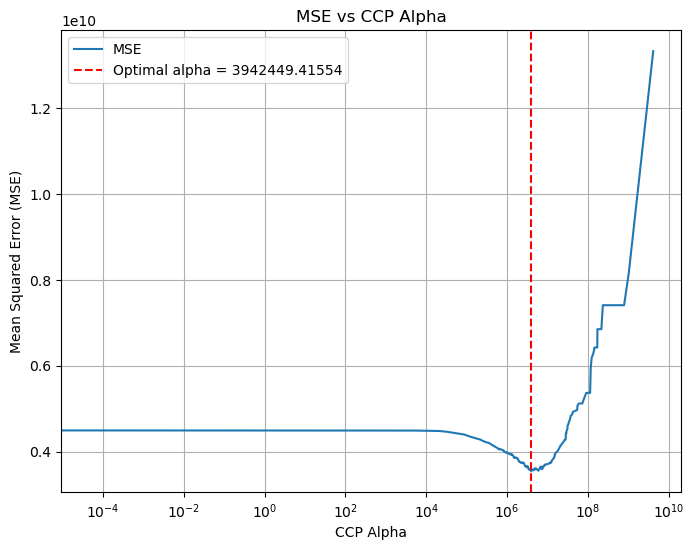

In [73]:
plt.figure(figsize=(8, 6))
plt.plot(ccp_alphas, mse_values, label='MSE') 
plt.axvline(ccp_alphas[best_index], color='red', linestyle='--', label=f'Optimal alpha = {ccp_alphas[best_index]:.5f}')
plt.xscale('log') 
plt.xlabel('CCP Alpha')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs CCP Alpha')
plt.legend()
plt.grid()
plt.show()


### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [75]:
# O melhor modelo é aquele com o menor MSE, então use o índice best_index
best_tree = trees[best_index]

# Predição para o conjunto de teste
y_pred_best = best_tree.predict(X_test)

# Cálculo do R-quadrado
r2 = r2_score(y_test, y_pred_best)

# Exibição do R-quadrado
print(f"R-quadrado do melhor modelo (CCP Alpha = {ccp_alphas[best_index]:.5f}): {r2:.5f}")

NameError: name 'r2_score' is not defined

### 7. Visualize esta árvore.